In [16]:
import numpy as np 
import pandas as pd
import datetime as dt 
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
from warnings import filterwarnings
from pandas.tseries.offsets import YearEnd

filterwarnings('ignore')


# 데이터 전처리

In [ ]:
# df = pd.read_excel('./DATA/총자산.xlsx', index_col=0, parse_dates=True)
# ticker = df.iloc[7]
# ticker = [x[1:] for x in ticker ]
# tmp = df.iloc[13:]
# tmp.columns = ticker
# tmp.index = pd.to_datetime(tmp.index)
# tmp.to_pickle('./DATA/kospi_total_asset.pkl')
# tmp

In [296]:
#df = pd.read_csv('./DATA/stock_data_price.csv', header=[0,1], index_col=0, parse_dates=True, encoding='euckr')
# df = pd.read_excel('./DATA/총자산.xlsx')
# '''엑셀 전처리'''
# ticker = df.iloc[8]
# tmp = df.iloc[13:]
# ticker[0] = 'Date'
# ticker.name = ''
# tmp.columns = ticker
# tmp = tmp.set_index('Date')

df = pd.read_pickle('./DATA/kospi_adj_close.pkl').astype(float)
df_cap = pd.read_pickle('./DATA/kospi_capital.pkl').astype(float)
#df_ta = pd.read_pickle('./DATA/kospi_total_asset.pkl').astype(float)
#df_pbr = pd.read_pickle('./DATA/kospi_pbr.pkl').astype(float)

'''총 자본의 경우 전처리 필요'''
# ta_raw = pd.read_excel('./DATA/코스피 총자본.xlsx', index_col=0, parse_dates=True)
# ticker = [x[1:] for x in ta_raw.iloc[7].to_list()[1:]]
# tmp = ta_raw.iloc[:,1:].iloc[12:]
# tmp.columns = ticker
# '''작년 회계정보는 올해 3월에 알 수 잇음'''
# tmp.index = [x+relativedelta(month=3, years=1) for x in pd.to_datetime(tmp.index)]
# tmp = tmp.asfreq('D').fillna(method='ffill').loc[df.index]
# tmp.to_pickle('./DATA/kospi_total_asset.pkl')

df_eq = pd.read_pickle('./DATA/kospi_total_asset.pkl').astype(float)

#df_eq = pd.read_pickle('./DATA/총자본.pkl').astype(float)
# '''상폐 포함 됨'''

Novy-Marx (2012) <br>

12개월~7개월, 6개월 부터 2개월, 10분위 포트폴리오,

상호 베타적인 10분위 포트폴리오 만들기

이건 걍 모멘텀

In [774]:
# df_close_daily = df.loc[:, (slice(None), '종가')].copy()
# df_close_daily.columns = df_close_daily.columns.get_level_values(0)

df_close_daily = df.copy()

df_close_ret = np.log(df_close_daily.astype(float)).diff().iloc[1:].copy()

df_close_ret.loc[:'1995-03'] = np.where(abs(df_close_ret.loc[:'1995-03']) > 0.041, np.NaN, df_close_ret.loc[:'1995-03'])
df_close_ret.loc['1995-04':'1996-10'] = np.where(abs(df_close_ret.loc['1995-04':'1996-10']) > 0.061, np.NaN, df_close_ret.loc['1995-04':'1996-10'])
df_close_ret.loc['1996-11':'1998-02'] = np.where(abs(df_close_ret.loc['1996-11':'1998-02']) > 0.081, np.NaN, df_close_ret.loc['1996-11':'1998-02'])
df_close_ret.loc['1998-03':'1998-11'] = np.where(abs(df_close_ret.loc['1998-03':'1998-11']) > 0.121, np.NaN, df_close_ret.loc['1998-03':'1998-11'])
df_close_ret.loc['1998-12':'2015-05'] = np.where(abs(df_close_ret.loc['1998-12':'2015-05']) > 0.151, np.NaN, df_close_ret.loc['1998-12':'2015-05'])
df_close_ret.loc['2015-06':] = np.where(abs(df_close_ret.loc['2015-06':]) > 0.301, np.NaN, df_close_ret.loc['2015-06':])

df_close_ret

'''mom_ret'''
mom_ret = ((df_close_ret+1).shift(20).rolling(250).apply(np.prod, raw=True) - 1).iloc[271:]
'''monthly 수익률'''
df_close_ret = (1.0 + df_close_ret).rolling(20).apply(np.prod, raw=True) - 1

mom_ret

,005930,373220,000660,207940,051910,006400,005380,000270,035420,005490,...,114410,117930,121910,122290,122750,138250,144620,152330,192520,192530
1990-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-05-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-05-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.049539,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-05-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.081308,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-05-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.100726,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-26,-0.060987,0.234521,-0.235255,-0.037045,0.364508,0.133334,0.071232,0.032850,-0.393675,0.219196,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-30,-0.050823,0.306296,-0.243821,-0.056215,0.423115,0.132299,0.045551,-0.004001,-0.390174,0.278001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-31,-0.021266,0.309999,-0.220117,-0.059575,0.458513,0.091208,0.021995,-0.026116,-0.362425,0.271698,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-01,-0.015247,0.333951,-0.221187,-0.103827,0.360281,0.090640,0.034224,-0.003614,-0.359448,0.236211,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [855]:
mom_ret_monthly = mom_ret.resample('m').last().iloc[:-1]
mom_ret_monthly

,005930,373220,000660,207940,051910,006400,005380,000270,035420,005490,...,114410,117930,121910,122290,122750,138250,144620,152330,192520,192530
1990-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.196508,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-07-31,-0.166521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-08-31,-0.264470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-09-30,-0.308169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-31,-0.330282,NaN,-0.445511,-0.093756,-0.134993,-0.160014,-0.321699,-0.329506,-0.569872,-0.072102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-28,-0.209788,NaN,-0.297312,-0.043370,-0.073268,-0.069698,-0.181276,-0.188502,-0.427473,0.042724,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-31,-0.184015,0.221311,-0.331421,-0.014809,0.136487,0.243349,-0.026947,0.017918,-0.401172,0.108222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-30,-0.109842,0.248589,-0.307286,-0.089824,0.243896,0.219938,-0.012177,0.055420,-0.446430,0.203638,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [909]:
real_ret_monthly = df_close_ret.resample('m').last().iloc[127:-1]
mom_ret_monthly = mom_ret.resample('m').last().iloc[:-1].loc[real_ret_monthly.index]
real_ret_monthly

,005930,373220,000660,207940,051910,006400,005380,000270,035420,005490,...,114410,117930,121910,122290,122750,138250,144620,152330,192520,192530
2000-01-31,0.028088,NaN,0.068507,NaN,NaN,-0.074105,-0.071541,-0.074163,NaN,0.044160,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-29,-0.094532,NaN,-0.345054,NaN,NaN,-0.271885,-0.315749,-0.064391,NaN,-0.182489,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-31,0.090686,NaN,0.015934,NaN,NaN,0.159270,-0.028449,0.159604,NaN,-0.017450,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-04-30,-0.244567,NaN,0.079020,NaN,NaN,0.047414,-0.181524,-0.039300,NaN,-0.188025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-31,0.010916,NaN,-0.029170,NaN,NaN,-0.087243,0.126078,0.189298,NaN,-0.028742,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-31,0.099793,0.188309,0.174182,-0.035432,0.144335,0.154805,0.101992,0.121387,0.134932,0.082617,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-28,-0.008841,-0.000549,0.004847,-0.026110,-0.020548,0.012004,0.053712,0.123269,0.022843,0.053312,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-31,0.056126,0.080511,0.008542,-0.001145,0.007890,-0.000777,0.045822,0.032237,-0.020564,0.101192,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-30,0.021326,-0.008717,0.006005,-0.010284,0.030563,-0.064907,0.067294,0.039645,-0.050566,0.010091,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

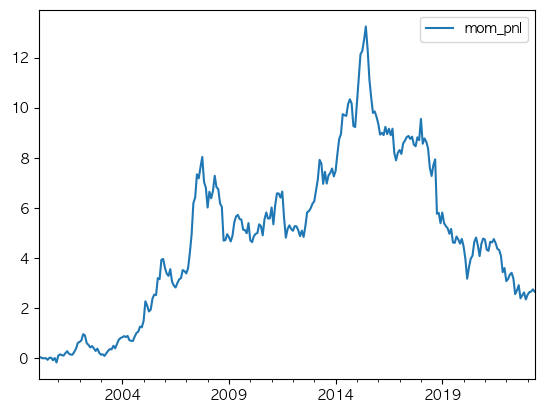

In [916]:
ivst_idx_list = []
pnl_ret_list = []

dict_list = {}

for num in range(len(mom_ret_monthly)-1):
    series = mom_ret_monthly.iloc[num].dropna()
    date_idx = series.name
    ivst_idx = mom_ret_monthly.index[np.where(mom_ret_monthly.index==date_idx)[0]+1][0]
    ret_series = real_ret_monthly.iloc[num+1]
    
    high_ret = ret_series.loc[series[series>series.quantile(0.9)].index].mean()
    #low_ret = ret_series.loc[series[series < series.quantile(0.1)].index].mean()
    low_ret = 0

    pnl_ret = high_ret - low_ret

    pnl_ret_list.extend([pnl_ret])
    ivst_idx_list.extend([ivst_idx])
    
mom_pnl = pd.DataFrame(pnl_ret_list, index=ivst_idx_list, columns=['mom_pnl'])   

((mom_pnl+1).cumprod()-1).plot()

In [917]:
((mom_pnl+1).cumprod()-1)

,mom_pnl
2000-02-29,0.001975
2000-03-31,0.023785
2000-04-30,-0.018294
2000-05-31,-0.019835
2000-06-30,-0.015189
...,...
2023-01-31,2.517423
2023-02-28,2.627247
2023-03-31,2.647497
2023-04-30,2.737508


In [847]:
# 디버깅용
# ivst_idx_list = []
# pnl_ret_list = []

# dict_list = {}

# for num in range(len(mom_ret_monthly)-1):
    
#     print('*******************')
#     print(num)
#     series = mom_ret_monthly.iloc[num]
#     date_idx = series.name
#     print(date_idx)
#     ivst_idx = mom_ret_monthly.index[np.where(mom_ret_monthly.index==date_idx)[0]+1][0]
#     print(ivst_idx)
#     high_ret = real_ret_monthly.loc[ivst_idx, series[series > series.quantile(0.9)].index].mean()
#     print(series[series >= series.quantile(0.9)].index)
#     print(high_ret)
#     low_ret = real_ret_monthly.loc[ivst_idx, series[series < series.quantile(0.1)].index].mean()
#     print(low_ret)
#     print(series[series <= series.quantile(0.1)].index)
#     pnl_ret = high_ret - low_ret
#     print(pnl_ret)
#     pnl_ret_list.extend([pnl_ret])
#     ivst_idx_list.extend([ivst_idx])
    
#     dict_list[ivst_idx] = pnl_ret
#     print('\n')    


*******************
0
1995-01-31 00:00:00
1995-02-28 00:00:00
Index(['000100', '000990', '005300', '005250', '003060', '001080', '003200',
       '000700', '000950', '002250', '011840'],
      dtype='object')
-0.10666106740322041
-0.02302835182362646
Index(['006400', '005380', '010140', '003830', '003480', '005800', '003780',
       '002550', '002940', '003600', '006600'],
      dtype='object')
-0.08363271557959395


*******************
1
1995-02-28 00:00:00
1995-03-31 00:00:00
Index(['005930', '000100', '000990', '004000', '005300', '005250', '002240',
       '001080', '001460', '000700', '000950', '002270'],
      dtype='object')
0.015127882427620152
-0.0138574439694334
Index(['000120', '004490', '000300', '003480', '003780', '000840', '002550',
       '002940', '004190', '005760', '006600', '015940'],
      dtype='object')
0.028985326397053552


*******************
2
1995-03-31 00:00:00
1995-04-30 00:00:00
Index(['017670', '005300', '014820', '002240', '003280', '000050', '001080',


340

In [833]:
pd.DataFrame.from_dict([dict_list]).T.iloc[34:]

,0
1997-12-31,NaN
1998-01-31,-0.215554
1998-02-28,NaN
1998-03-31,NaN
1998-04-30,NaN
...,...
2023-01-31,-0.041479
2023-02-28,0.046343
2023-03-31,0.022753
2023-04-30,0.016245


In [842]:
pd.DataFrame(pnl_ret_list).iloc[34]

0   NaN
Name: 34, dtype: float64

<AxesSubplot:>

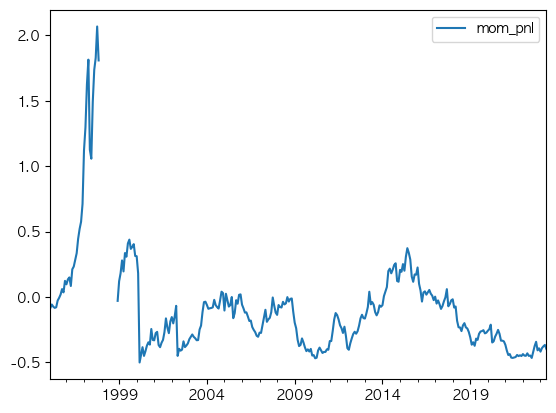

In [841]:
((pd.DataFrame(pnl_ret_list, index=ivst_idx_list, columns=['mom_pnl'])+1).cumprod()-1).plot()

# SMB, HML 만들기

In [402]:
df_close_daily = df.copy()

df_close_ret = np.log(df_close_daily.astype(float)).diff().iloc[1:].copy()

df_close_ret.loc[:'1995-03'] = np.where(abs(df_close_ret.loc[:'1995-03']) > 0.041, np.NaN, df_close_ret.loc[:'1995-03'])
df_close_ret.loc['1995-04':'1996-10'] = np.where(abs(df_close_ret.loc['1995-04':'1996-10']) > 0.061, np.NaN, df_close_ret.loc['1995-04':'1996-10'])
df_close_ret.loc['1996-11':'1998-02'] = np.where(abs(df_close_ret.loc['1996-11':'1998-02']) > 0.081, np.NaN, df_close_ret.loc['1996-11':'1998-02'])
df_close_ret.loc['1998-03':'1998-11'] = np.where(abs(df_close_ret.loc['1998-03':'1998-11']) > 0.121, np.NaN, df_close_ret.loc['1998-03':'1998-11'])
df_close_ret.loc['1998-12':'2015-05'] = np.where(abs(df_close_ret.loc['1998-12':'2015-05']) > 0.151, np.NaN, df_close_ret.loc['1998-12':'2015-05'])
df_close_ret.loc['2015-06':] = np.where(abs(df_close_ret.loc['2015-06':]) > 0.301, np.NaN, df_close_ret.loc['2015-06':])

'''Monthly Return 계산, 현재 시점 기준 전 한달 수익률임'''
df_close_ret = (1.0 + df_close_ret).rolling(20).apply(np.prod, raw=True) - 1

In [408]:
df_close_ret.iloc[:-10, 0]

1989-06-02         NaN
1989-06-03         NaN
1989-06-05         NaN
1989-06-07         NaN
1989-06-08         NaN
                ...   
2023-05-12   -0.029640
2023-05-15   -0.025079
2023-05-16    0.003731
2023-05-17   -0.005477
2023-05-18    0.008095
Name: 005930, Length: 8828, dtype: float64

SMB, HML 만들기

In [403]:
value_ratio = df_eq/df_cap
value_ratio.tail()

,005930,373220,000660,207940,051910,006400,005380,000270,035420,005490,...,114410,117930,121910,122290,122750,138250,144620,152330,192520,192530
2023-05-26,0.845295,0.152262,0.796129,0.162461,0.752056,0.361304,2.091031,1.119652,0.705911,1.910835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-30,0.821912,0.151737,0.788189,0.162253,0.756341,0.348724,2.143176,1.143196,0.709414,1.897675,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-31,0.832272,0.146924,0.800527,0.161011,0.766164,0.348724,2.148534,1.139204,0.716526,1.913489,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-01,0.838141,0.150698,0.788189,0.160194,0.772856,0.353649,2.175731,1.162204,0.700721,1.908188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-02,0.823050,0.149673,0.788189,0.160806,0.736410,0.350187,2.153919,1.148563,0.699007,1.829631,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [428]:
'''현재시점 > 다음달에 이대로 투자를 진행할 예정임 > 즉 지금 기준으로 만들어 놓고, 20 밀어서 다음달 적용 가능하게?? 근데 일단 SMB Port를 구성하는 것이니 시간은 그냥 맞추기만 하면 됨'''
'''Cap의 중간'''
small = df_cap.apply(lambda x: x[x<x.median()].index.to_list(), axis=1).dropna()
big = df_cap.apply(lambda x: x[x>x.median()].index.to_list(), axis=1).dropna()

'''가치는 equity/cap 한 것을 가지고 만듦'''
growth = value_ratio.apply(lambda x: x[x<x.quantile(0.3)].index.to_list(), axis=1).dropna()
neutral = value_ratio.apply(lambda x: x[(x>=x.quantile(0.3))& x<x.quantile(0.7)].index.to_list(), axis=1).dropna()
value = value_ratio.apply(lambda x: x[x>=x.quantile(0.7)].index.to_list(), axis=1).dropna()

In [429]:
small.index[0] == value.index[0]

True

In [430]:
small.index[-1] == value.index[-1]

True

인덱스 맞는지 체크

In [431]:
from tqdm import tqdm

print(set(df_close_ret.index) - set(small.index))
'''위에 공집합이여야, 아래 돌아감'''

set()


'위에 공집합이여야, 아래 돌아감'

SMB, HML 포트폴리오 뽑기

In [432]:
SMB_list = []
HML_list = []

for idx in tqdm(df_close_ret.index):

    bv = df_close_ret.loc[idx].loc[list(set(big.loc[idx]) & set(value.loc[idx]))].mean()
    bn = df_close_ret.loc[idx].loc[list(set(big.loc[idx]) & set(neutral.loc[idx]))].mean()
    bg = df_close_ret.loc[idx].loc[list(set(big.loc[idx]) & set(growth.loc[idx]))].mean()
    sv = df_close_ret.loc[idx].loc[list(set(small.loc[idx]) & set(value.loc[idx]))].mean()
    sn = df_close_ret.loc[idx].loc[list(set(small.loc[idx]) & set(neutral.loc[idx]))].mean()
    sg = df_close_ret.loc[idx].loc[list(set(small.loc[idx]) & set(growth.loc[idx]))].mean()

    SMB = (sv+sn+sg)/3 - (bv+bn+bg)/3
    HML = (sv+bv)/2 - (sg+bg)/2
    
    SMB_list.append(SMB)
    HML_list.append(HML)


100%|██████████| 8838/8838 [00:15<00:00, 559.68it/s]


0.00763556338388992

필요 데이터 불러오고 SMB, HML 체크

In [439]:
rf = pd.read_csv('./DATA/CD91.csv', index_col=0, parse_dates=True).apply(lambda x : x/100)
SMB = pd.DataFrame(SMB_list, index=df_close_ret.index, columns=['SMB']).dropna().loc[rf.index[0]:]
HML = pd.DataFrame(HML_list, index=df_close_ret.index, columns=['HML']).dropna().loc[rf.index[0]:]
rf = rf.loc[SMB.index]
mkt = pd.read_csv('./DATA/kospi_index.csv', index_col=0, parse_dates=True).fillna(method='ffill').pct_change(20).loc[SMB.index]

# Rolling Regression

스케일이 월간이니 rf/12 적용, MKT도 monthly로 맞춰주기

In [442]:
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS

In [443]:
aa = df_close_ret.columns[0]

In [447]:
exret = pd.DataFrame(pd.concat([df_close_ret[aa], rf],axis=1).dropna().apply(lambda x: x[0] - x[1]/12, axis=1), columns=['ExRet'])

setup_df = pd.concat([exret, mkt, SMB, HML], axis=1).dropna()
setup_df.tail()

,ExRet,KOSPI,SMB,HML
2023-05-26,0.092054,0.029773,0.025746,-0.014131
2023-05-30,0.114087,0.035944,0.024191,-0.017508
2023-05-31,0.085037,0.030218,0.024717,-0.025543
2023-06-01,0.074106,0.017739,0.017018,-0.019421
2023-06-02,0.098722,0.039962,0.000662,-0.015772


In [450]:
y = setup_df.iloc[:,[0]]
x = sm.add_constant(setup_df.iloc[:, 1:])

reg = RollingOLS(y, x, 720).fit()

coef_df = reg.params

resid = (y - pd.DataFrame(np.diag(np.dot(setup_df,coef_df.T)), index=setup_df.index, columns=['PRED']).values).rename(columns={'ExRet':aa})

resid

,005930
1994-06-29,NaN
1994-06-30,NaN
1994-07-01,NaN
1994-07-02,NaN
1994-07-04,NaN
...,...
2023-05-26,0.054930
2023-05-30,0.070108
2023-05-31,0.045876
2023-06-01,0.050080


In [531]:
resid_list = []

for name in tqdm(df_close_ret.columns):

    aa = name
    exret = pd.DataFrame(pd.concat([df_close_ret[aa], rf],axis=1).dropna().apply(lambda x: x[0] - x[1], axis=1), columns=['ExRet'])

    setup_df = pd.concat([exret, mkt, SMB, HML], axis=1).dropna()
    y = setup_df.iloc[:,[0]]
    x = sm.add_constant(setup_df.iloc[:, 1:])
    
    try:
        reg = RollingOLS(y, x, 720).fit()

        coef_df = reg.params

        resid = (y - pd.DataFrame(np.diag(np.dot(setup_df,coef_df.T)), index=setup_df.index, columns=['PRED']).values).rename(columns={'ExRet':aa})
        resid_list.append(resid)

    except:
        
        resid = pd.DataFrame(index=setup_df.index, columns=[aa])
        resid_list.append(resid)
        pass
    
resid_list

100%|██████████| 1102/1102 [06:25<00:00,  2.86it/s]


[              005930
 1994-06-29       NaN
 1994-06-30       NaN
 1994-07-01       NaN
 1994-07-02       NaN
 1994-07-04       NaN
 ...              ...
 2023-05-26  0.021976
 2023-05-30  0.037482
 2023-05-31  0.013739
 2023-06-01  0.017580
 2023-06-02  0.021141
 
 [7121 rows x 1 columns],
            373220
 2022-03-02    NaN
 2022-03-03    NaN
 2022-03-04    NaN
 2022-03-07    NaN
 2022-03-08    NaN
 ...           ...
 2023-05-26    NaN
 2023-05-30    NaN
 2023-05-31    NaN
 2023-06-01    NaN
 2023-06-02    NaN
 
 [312 rows x 1 columns],
               000660
 1997-01-24       NaN
 1997-01-25       NaN
 1997-01-27       NaN
 1997-01-28       NaN
 1997-01-29       NaN
 ...              ...
 2023-05-26  0.149242
 2023-05-30  0.137622
 2023-05-31  0.114871
 2023-06-01  0.144688
 2023-06-02  0.147383
 
 [5925 rows x 1 columns],
               207940
 2016-12-08       NaN
 2016-12-09       NaN
 2016-12-12       NaN
 2016-12-13       NaN
 2016-12-14       NaN
 ...              ...
 2023-0

In [532]:
resid_df = pd.concat(resid_list, axis=1).iloc[719:]
resid_df.tail()

,005930,373220,000660,207940,051910,006400,005380,000270,035420,005490,...,114410,117930,121910,122290,122750,138250,144620,152330,192520,192530
2023-05-26,0.021976,NaN,0.149242,-0.045674,-0.082792,-0.088709,-0.045880,-0.063230,-0.009669,-0.096177,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-30,0.037482,NaN,0.137622,-0.043720,-0.118884,-0.068953,-0.084113,-0.100749,-0.023080,-0.130218,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-31,0.013739,NaN,0.114871,-0.036797,-0.123802,-0.043165,-0.060598,-0.066317,-0.053999,-0.096539,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-01,0.017580,NaN,0.144688,-0.010486,-0.130403,-0.055033,-0.080362,-0.096506,-0.017368,-0.096175,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-02,0.021141,NaN,0.147383,-0.052664,-0.108604,-0.058487,-0.104411,-0.100591,-0.027029,-0.079618,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


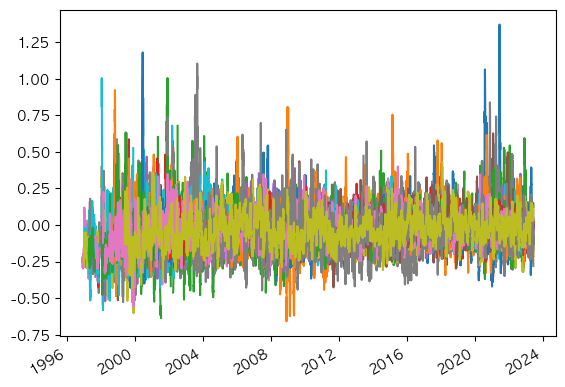

In [533]:
for x in resid_df.columns[0:50]:
    resid_df[x].plot()

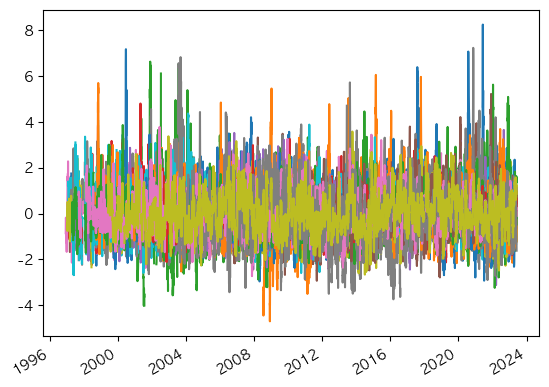

In [642]:
'''Time Series Standardize'''
resid_df_stan = resid_df.apply(lambda x: (x-x.mean())/x.std(), axis=1)
for x in resid_df_stan.columns[0:50]:
    resid_df_stan[x].plot()

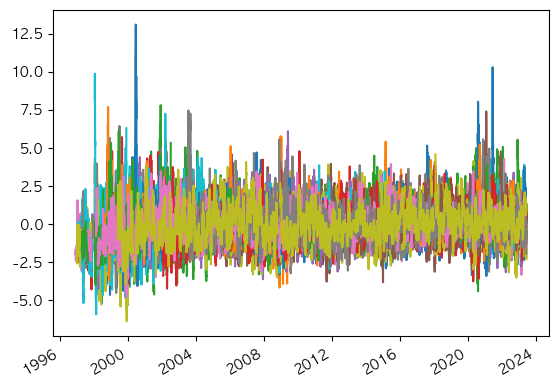

In [643]:
'''cross sectional standardize'''
resid_df_stan = resid_df.apply(lambda x: (x-x.mean())/x.std(), axis=0)
for x in resid_df_stan.columns[0:50]:
    resid_df_stan[x].plot()

# 잔차 가지고 포트폴리오 만들기

In [535]:
df_close_ret

,005930,373220,000660,207940,051910,006400,005380,000270,035420,005490,...,114410,117930,121910,122290,122750,138250,144620,152330,192520,192530
1989-06-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989-06-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989-06-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989-06-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989-06-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-26,0.095179,0.015721,0.242456,-0.008728,-0.030794,-0.015848,0.018010,0.017401,0.072035,-0.032567,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-30,0.117221,-0.014919,0.235278,-0.001054,-0.054338,0.014709,-0.009520,-0.014071,0.066162,-0.064135,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-31,0.088170,0.027389,0.206617,0.002762,-0.065278,0.036979,0.010778,0.014277,0.033258,-0.046952,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-01,0.077239,-0.015467,0.215886,0.026431,-0.080829,0.009373,-0.021555,-0.033078,0.051397,-0.056736,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [513]:
# series = resid_df_stan.iloc[-100]
# date_idx = series.name
# ret_date_idx = (np.where(df_close_ret.index==series.name)[0] + 20)[0]

# top_resid_ticks = series[series > series.quantile(0.9)].index
# low_resid_ticks = series[series < series.quantile(0.1)].index

# resid_ret = df_close_ret.iloc[ret_date_idx, :][top_resid_ticks].mean() - df_close_ret.iloc[ret_date_idx, :][low_resid_ticks].mean()


-0.09032811143647933

# 걍 레지듀얼 높은거 에서 낮은거 빼는 느낌쓰로

In [539]:
resid_mom_ret_list = []
resid_mom_ret_date_list = []

for x in tqdm(range(len(resid_df_stan)-20)):
    
    series = resid_df_stan.iloc[x]
    date_idx = series.name
    ret_date_idx = (np.where(df_close_ret.index==series.name)[0] + 20)[0]
    ret_date = df_close_ret.index[ret_date_idx]

    top_resid_ticks = series[series > series.quantile(0.9)].index
    low_resid_ticks = series[series < series.quantile(0.1)].index

    resid_mom_ret = - df_close_ret.iloc[ret_date_idx, :][top_resid_ticks].mean() + df_close_ret.iloc[ret_date_idx, :][low_resid_ticks].mean()
    
    resid_mom_ret_list.append(resid_mom_ret)
    resid_mom_ret_date_list.append(ret_date)
    
    

100%|██████████| 6608/6608 [00:11<00:00, 572.04it/s]


In [540]:
aa = pd.DataFrame(index=resid_mom_ret_date_list, data=resid_mom_ret_list, columns=['Residual Mom Return?'])

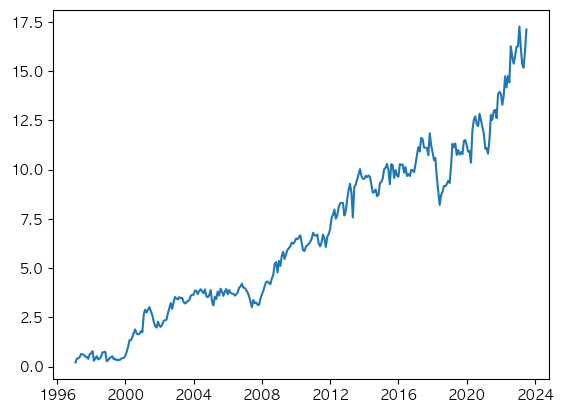

In [541]:
plt.plot((aa.resample('m').last() + 1).cumprod()-1)

In [542]:
cum_aa = (aa.resample('m').last() + 1).cumprod()-1
cum_aa

,Residual Mom Return?
1997-01-31,0.209923
1997-02-28,0.404834
1997-03-31,0.417037
1997-04-30,0.479259
1997-05-31,0.646865
...,...
2023-02-28,16.246952
2023-03-31,15.354556
2023-04-30,15.162719
2023-05-31,16.019655


In [549]:
ret_reg_df = aa.resample('m').last()
ret_reg_df

,Residual Mom Return?
1997-01-31,0.209923
1997-02-28,0.161094
1997-03-31,0.008686
1997-04-30,0.043910
1997-05-31,0.113304
...,...
2023-02-28,-0.055365
2023-03-31,-0.051742
2023-04-30,-0.011730
2023-05-31,0.053019


In [555]:
aa_reg_df = pd.concat([ret_reg_df, rf.resample('m').first()/12], axis=1).dropna()
aa_reg_df.apply(lambda x: x[0]-x[1], axis=1).mean()

1997-01-31    0.199090
1997-02-28    0.150802
1997-03-31   -0.001689
1997-04-30    0.032910
1997-05-31    0.102387
                ...   
2023-02-28   -0.058357
2023-03-31   -0.054751
2023-04-30   -0.014722
2023-05-31    0.050078
2023-06-30    0.060691
Freq: M, Length: 318, dtype: float64

In [560]:
aa_reg_df.apply(lambda x: x[0]-x[1], axis=1).mean() * 12 / (aa_reg_df.iloc[:, 0].std() * np.sqrt(12))

0.43253422585013146

In [561]:
aa_reg_df.apply(lambda x: x[0], axis=1).mean() * 12 / (aa_reg_df.iloc[:, 0].std() * np.sqrt(12))

0.6382821951409591

## 레지듀얼의 t-1 부터 t-12까지의 mean을 가지고 현재 시점에서 랭크 매겨서 하는것

In [925]:
resid_mom_ret_list_2 = []
resid_mom_ret_date_list_2 = []
top_resid_num = []

monthly_resid = resid_df_stan.resample('m').last()
monthly_ret = df_close_ret.resample('m').last().loc[monthly_resid.index]
                       
for x in tqdm(range(12, len(monthly_resid)-1)):
    
    '''모멘텀 기간 평균이고 이건'''
    #series = monthly_resid.iloc[x-12:x].mean()
    '''모멘텀 기간 변화분'''
    series = ((monthly_resid.iloc[x-12:x].pct_change().iloc[1:]+1).cumprod(axis=0)-1).iloc[-1]
    #series = 
    date_idx = monthly_resid.iloc[x].name
    ret_date_idx = (np.where(monthly_ret.index==monthly_resid.iloc[x].name)[0] + 1)[0]
    ret_date = monthly_ret.index[ret_date_idx]
    
    top_resid_ticks = series[series > series.quantile(0.9)].index
    low_resid_ticks = series[series < series.quantile(0.1)].index
    
    #resid_mom_ret = df_close_ret.iloc[ret_date_idx, :][top_resid_ticks].mean() - df_close_ret.iloc[ret_date_idx, :][low_resid_ticks].mean()
    resid_mom_ret = df_close_ret.iloc[ret_date_idx, :][top_resid_ticks].mean() - df_close_ret.iloc[ret_date_idx, :][low_resid_ticks].mean()
    #resid_mom_ret = df_close_ret.iloc[ret_date_idx, :][top_resid_ticks].mean() - df_close_ret.iloc[ret_date_idx, :][low_resid_ticks].mean()
    
    top_resid_num.append(len(top_resid_ticks))
    resid_mom_ret_list_2.append(resid_mom_ret)
    resid_mom_ret_date_list_2.append(ret_date)
    

100%|██████████| 306/306 [00:02<00:00, 123.72it/s]


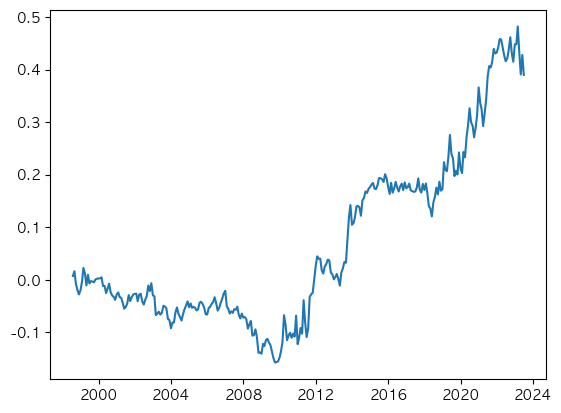

In [926]:
cc = pd.DataFrame(index=resid_mom_ret_date_list_2, data=resid_mom_ret_list_2, columns=['Residual Mom Return?']).dropna()
plt.plot((cc + 1).cumprod()-1)

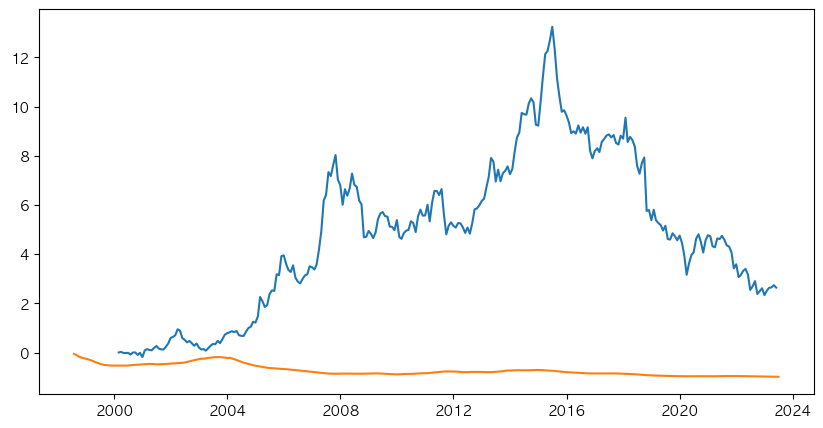

In [924]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot((mom_pnl+1).cumprod()-1)
plt.plot((cc+1).cumprod()-1)

In [918]:
mom_pnl

,mom_pnl
2000-02-29,0.001975
2000-03-31,0.021768
2000-04-30,-0.041102
2000-05-31,-0.001569
2000-06-30,0.004740
...,...
2023-01-31,0.055260
2023-02-28,0.031223
2023-03-31,0.005583
2023-04-30,0.024677


In [636]:
cum_cc = (cc.resample('m').last() + 1).cumprod()-1
cum_cc

,Residual Mom Return?
1998-07-31,-0.080649
1998-08-31,-0.138978
1998-09-30,-0.192401
1998-10-31,-0.227785
1998-11-30,-0.256518
...,...
2023-02-28,0.235697
2023-03-31,0.221397
2023-04-30,0.200813
2023-05-31,0.208377


In [594]:
monthly_resid.iloc[0:12].mean()

005930    0.193284
373220         NaN
000660         NaN
207940         NaN
051910         NaN
            ...   
138250         NaN
144620         NaN
152330         NaN
192520         NaN
192530         NaN
Length: 1102, dtype: float64

In [575]:
-20 * np.arange(552, 12*552)

array([ -11040,  -11060,  -11080, ..., -132420, -132440, -132460])

In [570]:
num_idx = 20 * np.arange(1, 12)

resid_df_stan.iloc[num_idx].mean()



005930   -0.102733
373220         NaN
000660   -0.118346
207940   -0.278043
051910   -0.126166
            ...   
138250         NaN
144620         NaN
152330         NaN
192520         NaN
192530         NaN
Length: 1102, dtype: float64